# Context

As an analyst at ABC Estate Wines, we are presented with historical data encompassing the sales of different types of wines throughout the 20th century. These datasets originate from the same company but represent sales figures for distinct wine varieties. Our objective is to delve into the data, analyze trends, patterns, and factors influencing wine sales over the course of the century. By leveraging data analytics and forecasting techniques, we aim to gain actionable insights that can inform strategic decision-making and optimize sales strategies for the future.

# Objective
The primary objective of this project is to analyze and forecast wine sales trends for the 20th century based on historical data provided by ABC Estate Wines. We aim to equip ABC Estate Wines with the necessary insights and foresight to enhance sales performance, capitalize on emerging market opportunities, and maintain a competitive edge in the wine industry.

## Define the problem and perform Exploratory Data Analysis
### Read the data as an appropriate time series data

In [1]:
# Import Libraies
import pandas as pd
import numpy as np
import seaborn as sns
from matplotlib import pyplot as plt
import matplotlib
import statsmodels

In [2]:
df = pd.read_csv('Rose.csv')
df.head()

,YearMonth,Rose
0,1980-01,112.0
1,1980-02,118.0
2,1980-03,129.0
3,1980-04,99.0
4,1980-05,116.0


In [3]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 187 entries, 0 to 186
Data columns (total 2 columns):
 #   Column     Non-Null Count  Dtype  
---  ------     --------------  -----  
 0   YearMonth  187 non-null    object 
 1   Rose       185 non-null    float64
dtypes: float64(1), object(1)
memory usage: 3.1+ KB


In [4]:
# Convert the 'YearMonth' column to datetime format
df['Date'] = pd.to_datetime(df['YearMonth'].astype(str) + '-01')
df.info(), df.head()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 187 entries, 0 to 186
Data columns (total 3 columns):
 #   Column     Non-Null Count  Dtype         
---  ------     --------------  -----         
 0   YearMonth  187 non-null    object        
 1   Rose       185 non-null    float64       
 2   Date       187 non-null    datetime64[ns]
dtypes: datetime64[ns](1), float64(1), object(1)
memory usage: 4.5+ KB


(None,
   YearMonth   Rose       Date
 0   1980-01  112.0 1980-01-01
 1   1980-02  118.0 1980-02-01
 2   1980-03  129.0 1980-03-01
 3   1980-04   99.0 1980-04-01
 4   1980-05  116.0 1980-05-01)

In [5]:
df = df.drop('YearMonth', axis=1)

In [6]:
df.set_index('Date', inplace=True)
df.head

<bound method NDFrame.head of              Rose
Date             
1980-01-01  112.0
1980-02-01  118.0
1980-03-01  129.0
1980-04-01   99.0
1980-05-01  116.0
...           ...
1995-03-01   45.0
1995-04-01   52.0
1995-05-01   28.0
1995-06-01   40.0
1995-07-01   62.0

[187 rows x 1 columns]>

### Plot the data

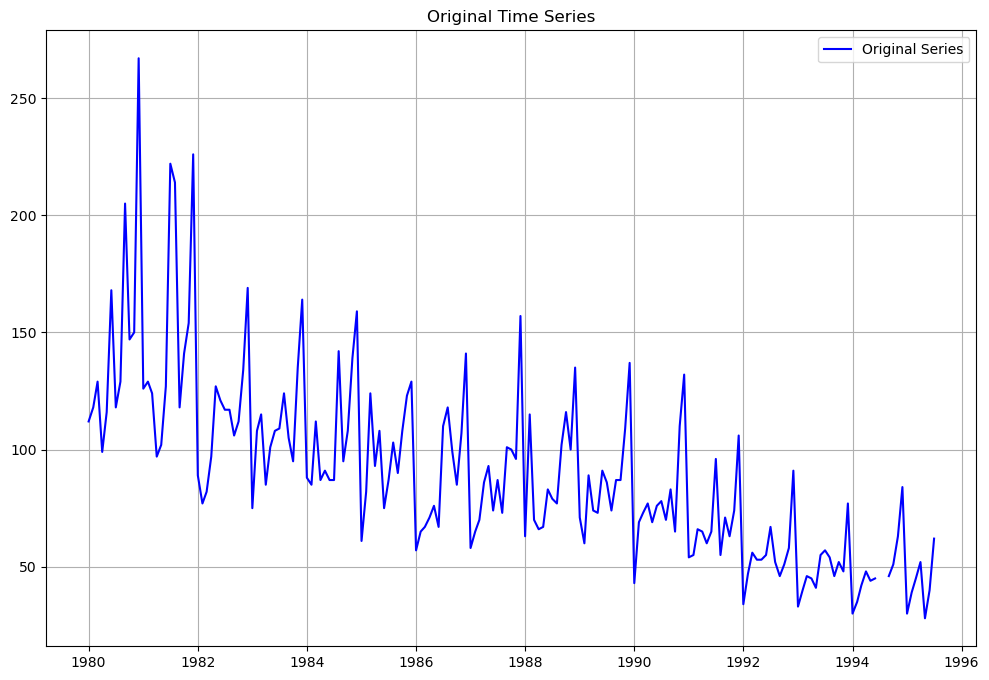

In [7]:
plt.figure(figsize=(12, 8))
plt.plot(df['Rose'], label='Original Series', color='blue')
plt.title('Original Time Series')
plt.legend()
plt.grid();

### Perform EDA

In [8]:
df.describe()

,Rose
count,185.000000
mean,90.394595
std,39.175344
min,28.000000
25%,63.000000
50%,86.000000
75%,112.000000
max,267.000000


### Perform Decomposition

C:\Users\sjaigu\AppData\Local\Temp\ipykernel_7064\2937004111.py:4: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  df['Rose'].fillna(method='ffill', inplace=True)
C:\Users\sjaigu\AppData\Local\Temp\ipykernel_7064\2937004111.py:4: FutureWarning: Series.fillna with 'method' is deprecated and will raise in a future version. Use obj.ffill() or obj.bfill() instead.
  df['Rose'].fillna(method='ffill', inplace=True)


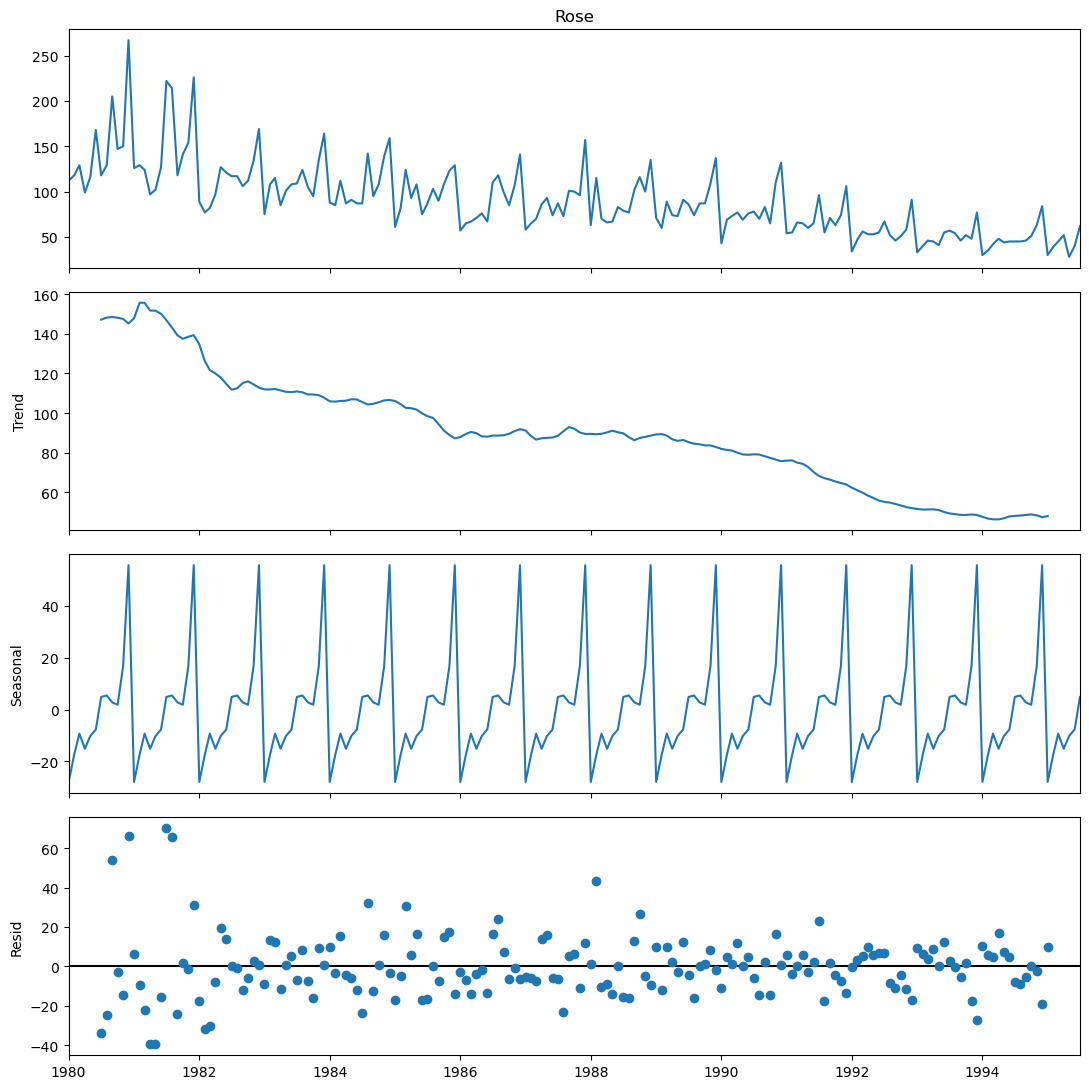

In [9]:
#Let first handle the missing values, indicate by the above plot between year 1994 & 1996

# Fill missing values using forward fill (since it's time series data)
df['Rose'].fillna(method='ffill', inplace=True)

from statsmodels.tsa.seasonal import seasonal_decompose

decomposition = seasonal_decompose(df['Rose'], model='additive') # Keeping period=default

plt.rcParams['figure.figsize'] = [11, 11]
decomposition.plot()
plt.show()

### Insights:
**Time Series Plot:** The plot of the time series shows how rose wine sales have fluctuated over time. It appears to exhibit some trends and possibly some seasonality.

**Statistics Summary:**
Descriptive statistic summary:
 - Mean sales: 90
 - Minimum sales: 28
 - Maximum sales: 267
 - Standard deviation: 39, 
 - Indicating some variability in the sales data.
    
**Decomposition:**
The second plot displays the decomposed components:
 - Trend: Shows a noticeable downward movement over time
 - Seasonality: Exhibits periodic fluctuations, likely linked to seasonal variations in wine demand.
 - Residual: Represents the remaining noise or irregular patterns after removing the trend and seasonality.

## Data Pre-processing

### Missing value treatment

In [10]:
# Missing values are already handle using the forwardfill method.
# Check for missing values
missing_values = df.isnull().sum()
missing_values

Rose    0
dtype: int64

### Visualize the processed data - Train-test split

In [11]:
# Since there are no missing values, proceed with train-test split
# Splitting data into training (80%) and testing (20%)
# train_size = int(len(df) * 0.8)
# train_data, test_data = df.iloc[:train_size], df.iloc[train_size:]

train_data = df[0:int(len(df)*0.8)] 
test_data = df[int(len(df)*0.8):]
print(train_data.shape)
print(test_data.shape)

(149, 1)
(38, 1)


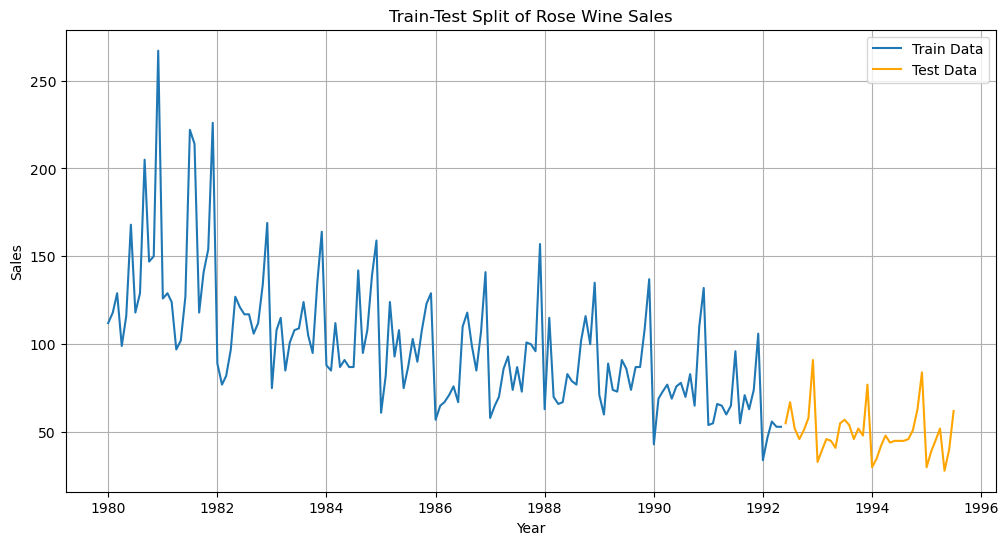

In [12]:
# Plot the training and testing data
plt.figure(figsize=(12, 6))
plt.plot(train_data.index, train_data['Rose'], label='Train Data')
plt.plot(test_data.index, test_data['Rose'], label='Test Data', color='orange')
plt.title('Train-Test Split of Rose Wine Sales')
plt.xlabel('Year')
plt.ylabel('Sales')
plt.grid(True)
plt.legend()
plt.show()

## Model Building - Original Data
### Build forecasting models

### Linear regression

In [13]:
train_time = [i+1 for i in range(len(train_data))]
test_time = [i+150 for i in range(len(test_data))]
print('Training Time instance','\n',train_time)
print('Test Time instance','\n',test_time)

Training Time instance 
 [1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13, 14, 15, 16, 17, 18, 19, 20, 21, 22, 23, 24, 25, 26, 27, 28, 29, 30, 31, 32, 33, 34, 35, 36, 37, 38, 39, 40, 41, 42, 43, 44, 45, 46, 47, 48, 49, 50, 51, 52, 53, 54, 55, 56, 57, 58, 59, 60, 61, 62, 63, 64, 65, 66, 67, 68, 69, 70, 71, 72, 73, 74, 75, 76, 77, 78, 79, 80, 81, 82, 83, 84, 85, 86, 87, 88, 89, 90, 91, 92, 93, 94, 95, 96, 97, 98, 99, 100, 101, 102, 103, 104, 105, 106, 107, 108, 109, 110, 111, 112, 113, 114, 115, 116, 117, 118, 119, 120, 121, 122, 123, 124, 125, 126, 127, 128, 129, 130, 131, 132, 133, 134, 135, 136, 137, 138, 139, 140, 141, 142, 143, 144, 145, 146, 147, 148, 149]
Test Time instance 
 [150, 151, 152, 153, 154, 155, 156, 157, 158, 159, 160, 161, 162, 163, 164, 165, 166, 167, 168, 169, 170, 171, 172, 173, 174, 175, 176, 177, 178, 179, 180, 181, 182, 183, 184, 185, 186, 187]


In [14]:
LinearRegression_train = train_data.copy()
LinearRegression_test = test_data.copy()

In [15]:
LinearRegression_train['time'] = train_time
LinearRegression_test['time'] = test_time

print('First few rows of Training Data','\n',LinearRegression_train.head(),'\n')
print('Last few rows of Training Data','\n',LinearRegression_train.tail(),'\n')
print('First few rows of Test Data','\n',LinearRegression_test.head(),'\n')
print('Last few rows of Test Data','\n',LinearRegression_test.tail(),'\n')

First few rows of Training Data 
              Rose  time
Date                   
1980-01-01  112.0     1
1980-02-01  118.0     2
1980-03-01  129.0     3
1980-04-01   99.0     4
1980-05-01  116.0     5 

Last few rows of Training Data 
             Rose  time
Date                  
1992-01-01  34.0   145
1992-02-01  47.0   146
1992-03-01  56.0   147
1992-04-01  53.0   148
1992-05-01  53.0   149 

First few rows of Test Data 
             Rose  time
Date                  
1992-06-01  55.0   150
1992-07-01  67.0   151
1992-08-01  52.0   152
1992-09-01  46.0   153
1992-10-01  51.0   154 

Last few rows of Test Data 
             Rose  time
Date                  
1995-03-01  45.0   183
1995-04-01  52.0   184
1995-05-01  28.0   185
1995-06-01  40.0   186
1995-07-01  62.0   187 



In [16]:
#Now that our training and test data has been modified, we can go ahead and build a linear regression model
from sklearn.linear_model import LinearRegression
lr_model = LinearRegression()
lr_model.fit(LinearRegression_train[['time']], LinearRegression_train['Rose'].values)

test_predictions_model1 = lr_model.predict(LinearRegression_test[['time']])
LinearRegression_test['RegOnTime'] = test_predictions_model1

#lr_preds = lr_model.predict(test_X)

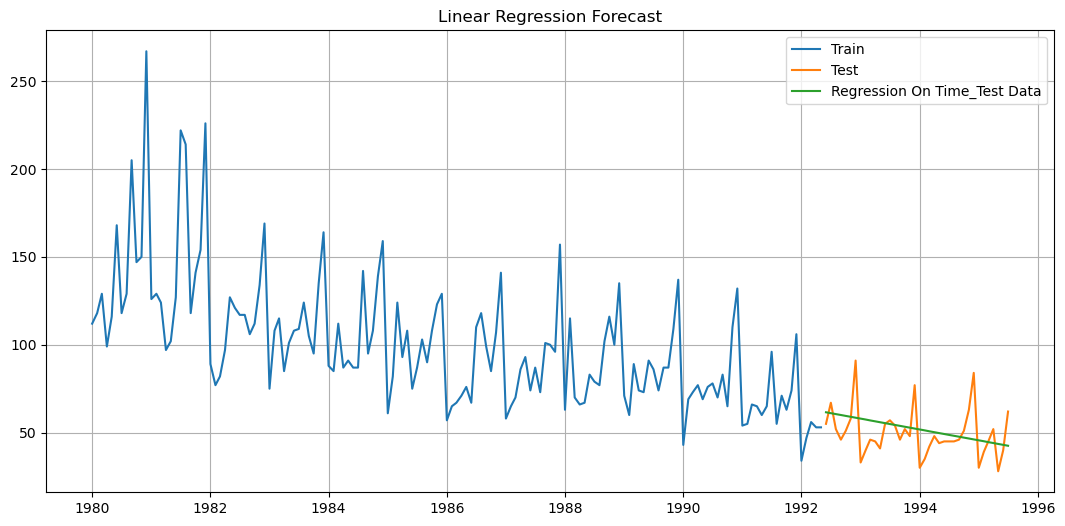

In [17]:
plt.figure(figsize=(13,6))
plt.plot(train_data['Rose'], label='Train')
plt.plot(test_data['Rose'], label='Test')
plt.plot(LinearRegression_test['RegOnTime'], label='Regression On Time_Test Data')
plt.legend(loc='best')
plt.title("Linear Regression Forecast")
plt.grid();
# Show plot
plt.show()

### Model Evaluation

In [18]:
from sklearn import metrics
rmse_model1_test = metrics.root_mean_squared_error(test_data['Rose'],test_predictions_model1)
print("For RegressionOnTime forecast on the Test Data,  RMSE is %3.2f" %(rmse_model1_test))

For RegressionOnTime forecast on the Test Data,  RMSE is 13.74


In [19]:
resultsDf = pd.DataFrame({'Test RMSE': [rmse_model1_test]},index=['RegressionOnTime'])
resultsDf

,Test RMSE
RegressionOnTime,13.736625


### Simple Average

In [20]:
SimpleAverage_train = train_data.copy()
SimpleAverage_test = test_data.copy()

In [21]:
SimpleAverage_test['mean_forecast'] = train_data['Rose'].mean()
SimpleAverage_test.head()

,Rose,mean_forecast
Date,,
1992-06-01,55.0,100.167785
1992-07-01,67.0,100.167785
1992-08-01,52.0,100.167785
1992-09-01,46.0,100.167785
1992-10-01,51.0,100.167785


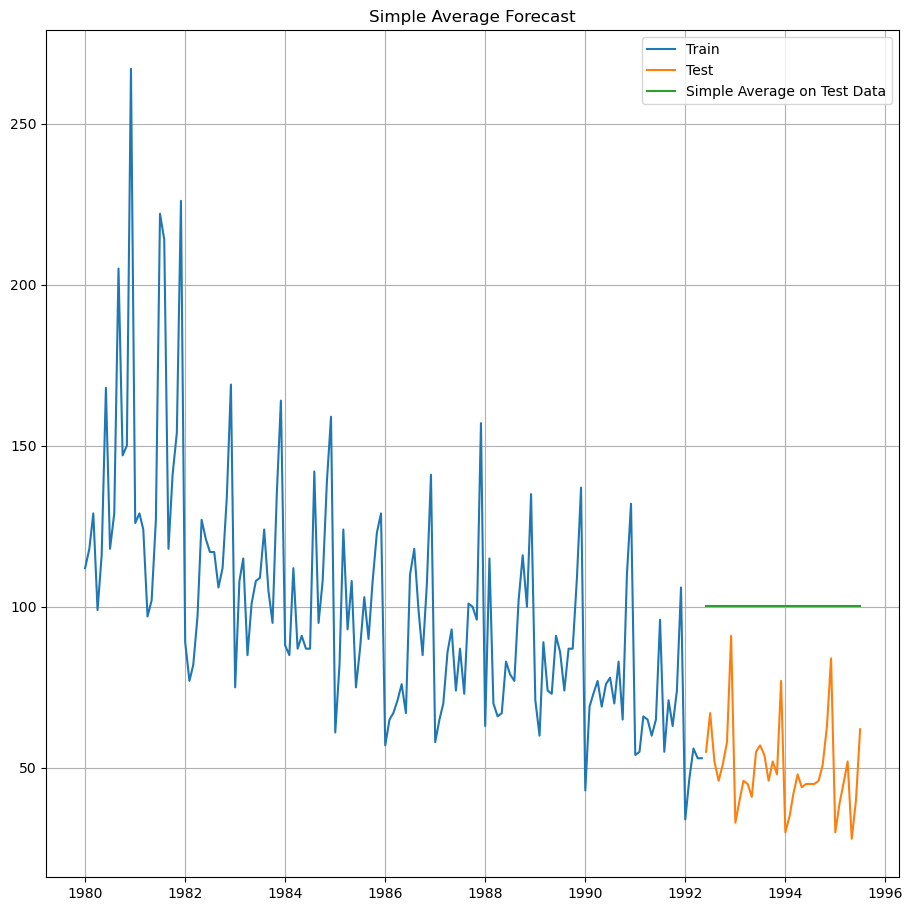

In [22]:
plt.plot(SimpleAverage_train['Rose'], label='Train')
plt.plot(SimpleAverage_test['Rose'], label='Test')
plt.plot(SimpleAverage_test['mean_forecast'], label='Simple Average on Test Data')
plt.legend(loc='best')
plt.title("Simple Average Forecast")
plt.grid()
plt.show()

### Model Evaluation

In [23]:
#rmse_model2_test = metrics.mean_squared_error(test['Births'],SimpleAverage_test['mean_forecast'],squared=False)
rmse_model2_test = metrics.root_mean_squared_error(test_data['Rose'], SimpleAverage_test['mean_forecast'])
print("For Simple Average forecast on the Test Data,  RMSE is %3.3f" %(rmse_model2_test))

For Simple Average forecast on the Test Data,  RMSE is 52.239


In [24]:
resultsDf_2 = pd.DataFrame({'Test RMSE': [rmse_model2_test]}
                           ,index=['SimpleAverageModel'])

resultsDf = pd.concat([resultsDf, resultsDf_2])
resultsDf

,Test RMSE
RegressionOnTime,13.736625
SimpleAverageModel,52.239499


### Moving Average

In [25]:
MovingAverage = df.copy()
MovingAverage.head()

,Rose
Date,
1980-01-01,112.0
1980-02-01,118.0
1980-03-01,129.0
1980-04-01,99.0
1980-05-01,116.0


In [26]:

MovingAverage['Trailing_2'] = MovingAverage['Rose'].rolling(2).mean()
MovingAverage['Trailing_4'] = MovingAverage['Rose'].rolling(4).mean()
MovingAverage['Trailing_6'] = MovingAverage['Rose'].rolling(6).mean()
MovingAverage['Trailing_9'] = MovingAverage['Rose'].rolling(9).mean()

MovingAverage.head()

,Rose,Trailing_2,Trailing_4,Trailing_6,Trailing_9
Date,,,,,
1980-01-01,112.0,NaN,NaN,NaN,NaN
1980-02-01,118.0,115.0,NaN,NaN,NaN
1980-03-01,129.0,123.5,NaN,NaN,NaN
1980-04-01,99.0,114.0,114.5,NaN,NaN
1980-05-01,116.0,107.5,115.5,NaN,NaN


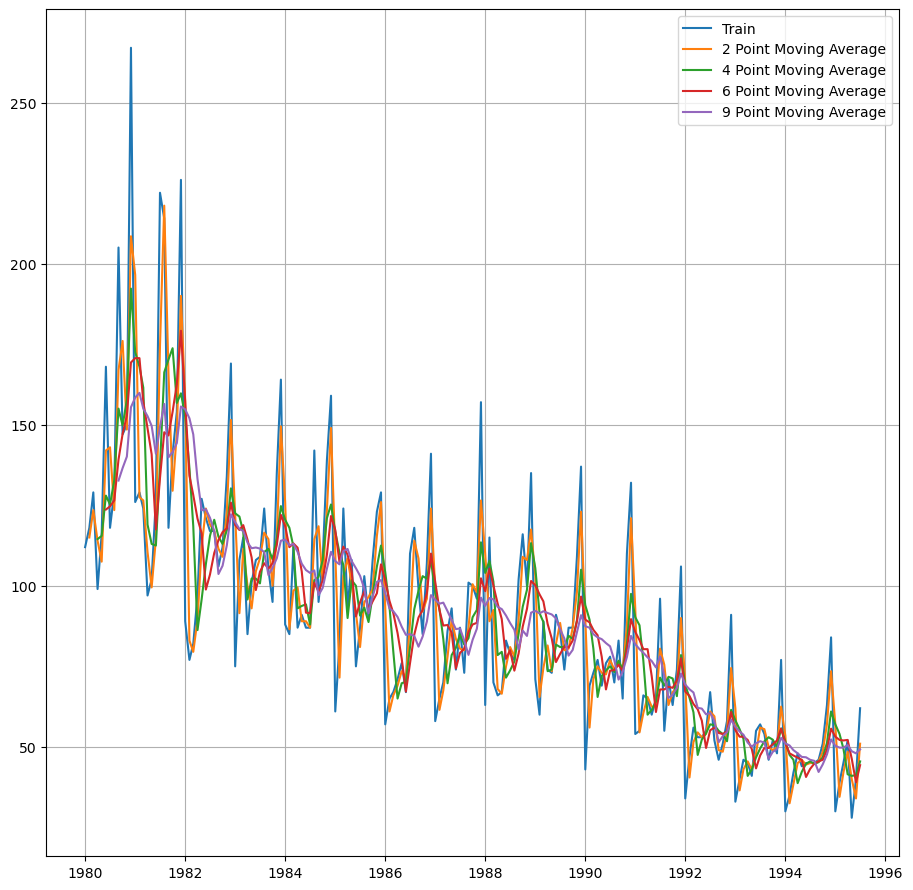

In [27]:
## Plotting on the whole data

plt.plot(MovingAverage['Rose'], label='Train')
plt.plot(MovingAverage['Trailing_2'], label='2 Point Moving Average')
plt.plot(MovingAverage['Trailing_4'], label='4 Point Moving Average')
plt.plot(MovingAverage['Trailing_6'], label ='6 Point Moving Average')
plt.plot(MovingAverage['Trailing_9'], label ='9 Point Moving Average')
plt.legend(loc = 'best')
plt.grid()
plt.show()

In [28]:
#Creating train and test set 
trailing_MovingAverage_train=MovingAverage[0:int(len(MovingAverage)*0.8)] 
trailing_MovingAverage_test=MovingAverage[int(len(MovingAverage)*0.8):]

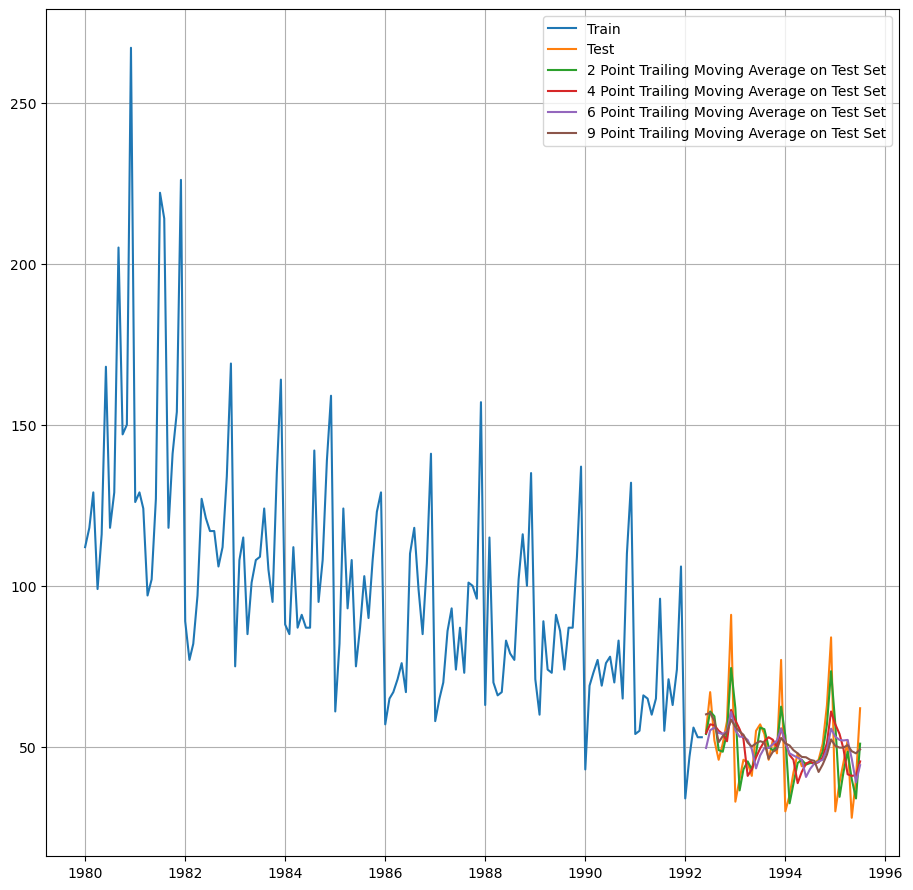

In [29]:
## Plotting on both the Training and Test data
plt.plot(trailing_MovingAverage_train['Rose'], label='Train')
plt.plot(trailing_MovingAverage_test['Rose'], label='Test')
plt.plot(trailing_MovingAverage_test['Trailing_2'], label='2 Point Trailing Moving Average on Test Set')
plt.plot(trailing_MovingAverage_test['Trailing_4'], label='4 Point Trailing Moving Average on Test Set')
plt.plot(trailing_MovingAverage_test['Trailing_6'],label = '6 Point Trailing Moving Average on Test Set')
plt.plot(trailing_MovingAverage_test['Trailing_9'],label = '9 Point Trailing Moving Average on Test Set')
#plt.title("Moving Average Forecast")
plt.legend(loc = 'best')
plt.grid();

### Model Evaluation

In [30]:
rmse_model4_test_2 = metrics.root_mean_squared_error(test_data['Rose'],trailing_MovingAverage_test['Trailing_2'])
print("For 2 point Moving Average Model forecast on the Training Data,  RMSE is %3.3f" %(rmse_model4_test_2))

## Test Data - RMSE --> 4 point Trailing MA

rmse_model4_test_4 = metrics.root_mean_squared_error(test_data['Rose'],trailing_MovingAverage_test['Trailing_4'])
print("For 4 point Moving Average Model forecast on the Training Data,  RMSE is %3.3f" %(rmse_model4_test_4))

## Test Data - RMSE --> 6 point Trailing MA

rmse_model4_test_6 = metrics.root_mean_squared_error(test_data['Rose'],trailing_MovingAverage_test['Trailing_6'])
print("For 6 point Moving Average Model forecast on the Training Data,  RMSE is %3.3f" %(rmse_model4_test_6))

## Test Data - RMSE --> 9 point Trailing MA

rmse_model4_test_9 = metrics.root_mean_squared_error(test_data['Rose'],trailing_MovingAverage_test['Trailing_9'])
print("For 9 point Moving Average Model forecast on the Training Data,  RMSE is %3.3f" %(rmse_model4_test_9))

For 2 point Moving Average Model forecast on the Training Data,  RMSE is 9.402
For 4 point Moving Average Model forecast on the Training Data,  RMSE is 12.187
For 6 point Moving Average Model forecast on the Training Data,  RMSE is 12.413
For 9 point Moving Average Model forecast on the Training Data,  RMSE is 12.621


In [31]:
resultsDf_3 = pd.DataFrame({'Test RMSE': [rmse_model4_test_2,rmse_model4_test_4
                                          ,rmse_model4_test_6,rmse_model4_test_9]}
                           ,index=['2pointTrailingMovingAverage','4pointTrailingMovingAverage'
                                   ,'6pointTrailingMovingAverage','9pointTrailingMovingAverage'])

resultsDf = pd.concat([resultsDf, resultsDf_3])
resultsDf

,Test RMSE
RegressionOnTime,13.736625
SimpleAverageModel,52.239499
2pointTrailingMovingAverage,9.402197
4pointTrailingMovingAverage,12.186935
6pointTrailingMovingAverage,12.413090
9pointTrailingMovingAverage,12.620569


### Single Exponential Smoothing

In [32]:
from statsmodels.tsa.api import ExponentialSmoothing, SimpleExpSmoothing, Holt
SES_train = train_data.copy()
SES_test = test_data.copy()

In [33]:
model_SES = SimpleExpSmoothing(SES_train['Rose'])
model_SES_autofit = model_SES.fit(optimized=True)
model_SES_autofit.params

C:\ProgramData\anaconda3\Lib\site-packages\statsmodels\tsa\base\tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  self._init_dates(dates, freq)


{'smoothing_level': 0.1287031842317013,
 'smoothing_trend': nan,
 'smoothing_seasonal': nan,
 'damping_trend': nan,
 'initial_level': 112.0,
 'initial_trend': nan,
 'initial_seasons': array([], dtype=float64),
 'use_boxcox': False,
 'lamda': None,
 'remove_bias': False}

In [34]:
SES_test['predict'] = model_SES_autofit.forecast(steps=len(test_data))
SES_test.head()

,Rose,predict
Date,,
1992-06-01,55.0,63.153863
1992-07-01,67.0,63.153863
1992-08-01,52.0,63.153863
1992-09-01,46.0,63.153863
1992-10-01,51.0,63.153863


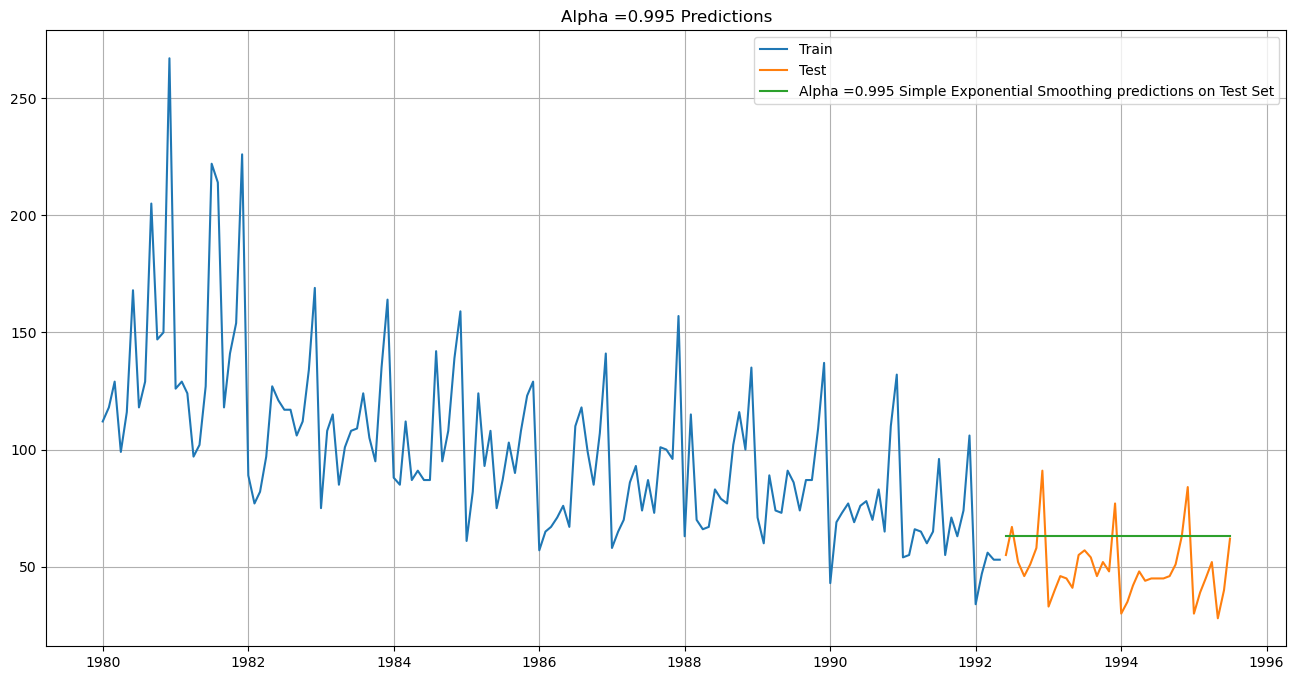

In [35]:
## Plotting on both the Training and Test data
plt.figure(figsize=(16,8))
plt.plot(SES_train['Rose'], label='Train')
plt.plot(SES_test['Rose'], label='Test')
plt.plot(SES_test['predict'], label='Alpha =0.995 Simple Exponential Smoothing predictions on Test Set')
plt.legend(loc='best')
plt.title('Alpha =0.995 Predictions')
plt.grid()
plt.show()

### Model Evaluation

In [36]:
rmse_model5_test_1 = metrics.root_mean_squared_error(SES_test['Rose'],SES_test['predict'])
print("For Alpha =0.995 Single Exponential Smoothing Model forecast on the Test Data, RMSE is %3.3f" %(rmse_model5_test_1))


For Alpha =0.995 Single Exponential Smoothing Model forecast on the Test Data, RMSE is 19.021


In [37]:
resultsDf_4 = pd.DataFrame({'Test RMSE': [rmse_model5_test_1]},index=['Alpha=0.995,SimpleExponentialSmoothing'])
resultsDf = pd.concat([resultsDf, resultsDf_4])
resultsDf

,Test RMSE
RegressionOnTime,13.736625
SimpleAverageModel,52.239499
2pointTrailingMovingAverage,9.402197
4pointTrailingMovingAverage,12.186935
6pointTrailingMovingAverage,12.413090
9pointTrailingMovingAverage,12.620569
"Alpha=0.995,SimpleExponentialSmoothing",19.021186


In [38]:
# Setting different alpha values. Remember, the higher the alpha value more weightage is given to the more recent observation.
# We will run a loop with different alpha values to understand which particular value works best for alpha on the test set.
# First we will define an empty dataframe to store our values from the loop

resultsDf_5 = pd.DataFrame({'Alpha Values':[],'Train RMSE':[],'Test RMSE': []})

for i in np.arange(0.3,1,0.1):
    model_SES_alpha_i = model_SES.fit(smoothing_level=i,optimized=False,use_brute=True)
    SES_train['predict',i] = model_SES_alpha_i.fittedvalues
    SES_test['predict',i] = model_SES_alpha_i.forecast(steps=len(test_data))
    
    rmse_model5_train_i = metrics.root_mean_squared_error(SES_train['Rose'], SES_train['predict',i])
    
    rmse_model5_test_i = metrics.root_mean_squared_error(SES_test['Rose'], SES_test['predict',i])

    new_row = pd.DataFrame({'Alpha Values': [i], 
                            'Train RMSE': [rmse_model5_train_i], 
                            'Test RMSE': [rmse_model5_test_i]})
    
    resultsDf_5 = pd.concat([resultsDf_5, new_row], ignore_index=True)

In [39]:
# Evalution of model based on different alpha value
resultsDf_5.sort_values(by=['Test RMSE'],ascending=True)

,Alpha Values,Train RMSE,Test RMSE
6,0.9,36.636990,13.838498
5,0.8,35.487361,13.845197
4,0.7,34.465075,13.850866
3,0.6,33.562525,13.873666
2,0.5,32.774372,13.962158
1,0.4,32.088907,14.220091
0,0.3,31.483475,14.878568


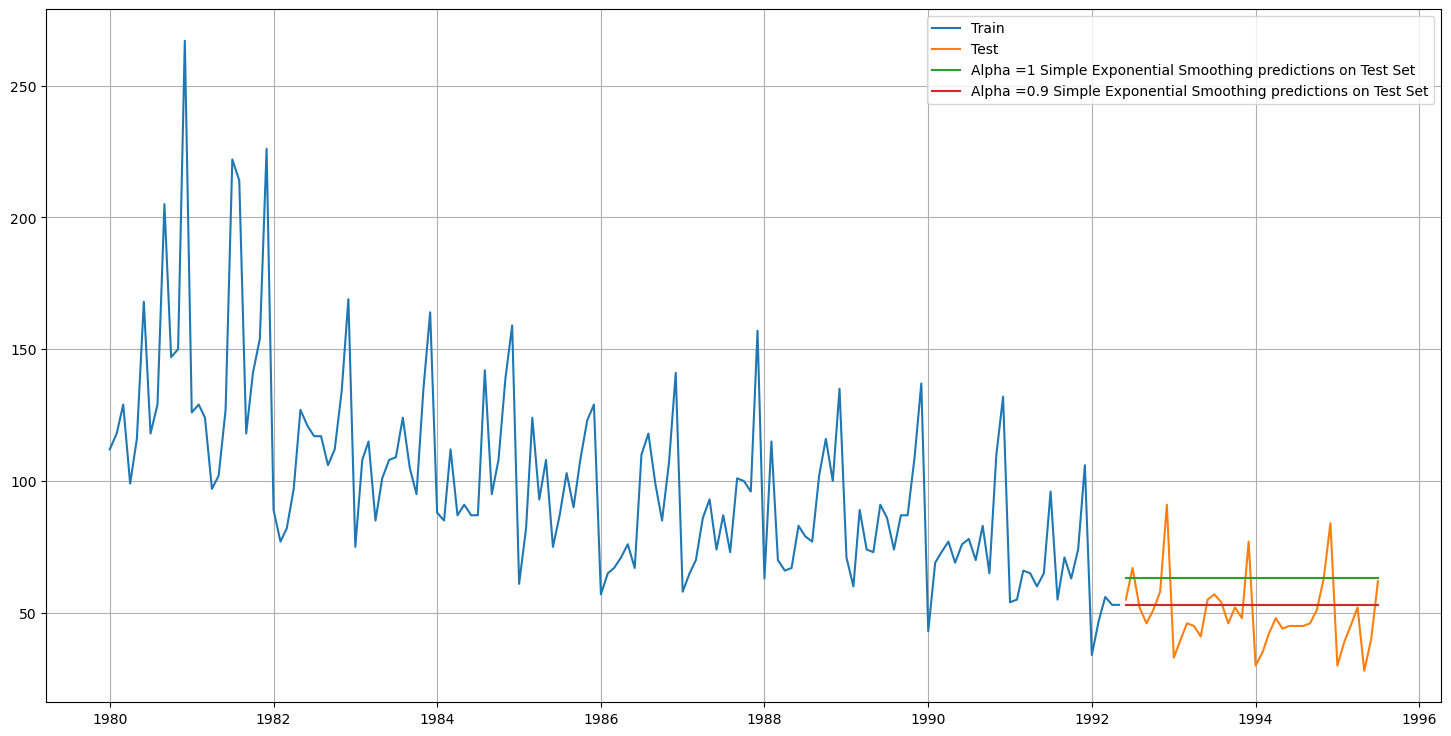

In [40]:
plt.figure(figsize=(18,9))
plt.plot(SES_train['Rose'], label='Train')
plt.plot(SES_test['Rose'], label='Test')
plt.plot(SES_test['predict'], label='Alpha =1 Simple Exponential Smoothing predictions on Test Set')
plt.plot(SES_test['predict', 0.9000000000000001], label='Alpha =0.9 Simple Exponential Smoothing predictions on Test Set') # Has lowest Test RMSE
plt.legend(loc='best')
plt.grid();

### Model Evaluation

In [41]:
resultsDf_6_1 = pd.DataFrame({'Test RMSE': [resultsDf_5.sort_values(by=['Test RMSE'],ascending=True).values[0][2]]}
                           ,index=['Alpha=0.9,SimpleExponentialSmoothing'])

resultsDf = pd.concat([resultsDf, resultsDf_6_1])
resultsDf

,Test RMSE
RegressionOnTime,13.736625
SimpleAverageModel,52.239499
2pointTrailingMovingAverage,9.402197
4pointTrailingMovingAverage,12.186935
6pointTrailingMovingAverage,12.413090
9pointTrailingMovingAverage,12.620569
"Alpha=0.995,SimpleExponentialSmoothing",19.021186
"Alpha=0.9,SimpleExponentialSmoothing",13.838498


### Double Exponential Smoothing

In [42]:
DES_train = train_data.copy()
DES_test = test_data.copy()

In [43]:
model_DES = Holt(DES_train['Rose'])

C:\ProgramData\anaconda3\Lib\site-packages\statsmodels\tsa\base\tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  self._init_dates(dates, freq)


In [44]:
resultsDf_7 = pd.DataFrame({'Alpha Values':[],'Beta Values':[],'Train RMSE':[],'Test RMSE': []})

for i in np.arange(0.3,1.1,0.1):
    for j in np.arange(0.3,1.1,0.1):
        model_DES_alpha_i_j = model_DES.fit(smoothing_level=i,smoothing_trend=j,optimized=False,use_brute=True)
        DES_train['predict',i,j] = model_DES_alpha_i_j.fittedvalues
        DES_test['predict',i,j] = model_DES_alpha_i_j.forecast(steps=len(test_data))
        
        rmse_model6_train = metrics.root_mean_squared_error(DES_train['Rose'],DES_train['predict',i,j])
        
        rmse_model6_test = metrics.root_mean_squared_error(DES_test['Rose'],DES_test['predict',i,j])
    
        new_row = pd.DataFrame({'Alpha Values': [i], 
                                'Beta Values': [j],
                            'Train RMSE': [rmse_model6_train], 
                            'Test RMSE': [rmse_model6_test]})
    
        resultsDf_7 = pd.concat([resultsDf_7, new_row], ignore_index=True)        

In [45]:
resultsDf_7.sort_values(by=['Test RMSE']).head()

,Alpha Values,Beta Values,Train RMSE,Test RMSE
47,0.8,1.0,52.866144,13.180564
62,1.0,0.9,59.281740,13.195065
61,1.0,0.8,56.244829,13.195787
60,1.0,0.7,53.436790,13.202028
34,0.7,0.5,41.482288,13.232408


In [46]:
DES_test.columns

Index([                                             'Rose',
                                     ('predict', 0.3, 0.3),
                                     ('predict', 0.3, 0.4),
                                     ('predict', 0.3, 0.5),
                      ('predict', 0.3, 0.6000000000000001),
                      ('predict', 0.3, 0.7000000000000002),
                      ('predict', 0.3, 0.8000000000000003),
                      ('predict', 0.3, 0.9000000000000001),
                      ('predict', 0.3, 1.0000000000000002),
                                     ('predict', 0.4, 0.3),
                                     ('predict', 0.4, 0.4),
                                     ('predict', 0.4, 0.5),
                      ('predict', 0.4, 0.6000000000000001),
                      ('predict', 0.4, 0.7000000000000002),
                      ('predict', 0.4, 0.8000000000000003),
                      ('predict', 0.4, 0.9000000000000001),
                      ('predict', 0.4, 1

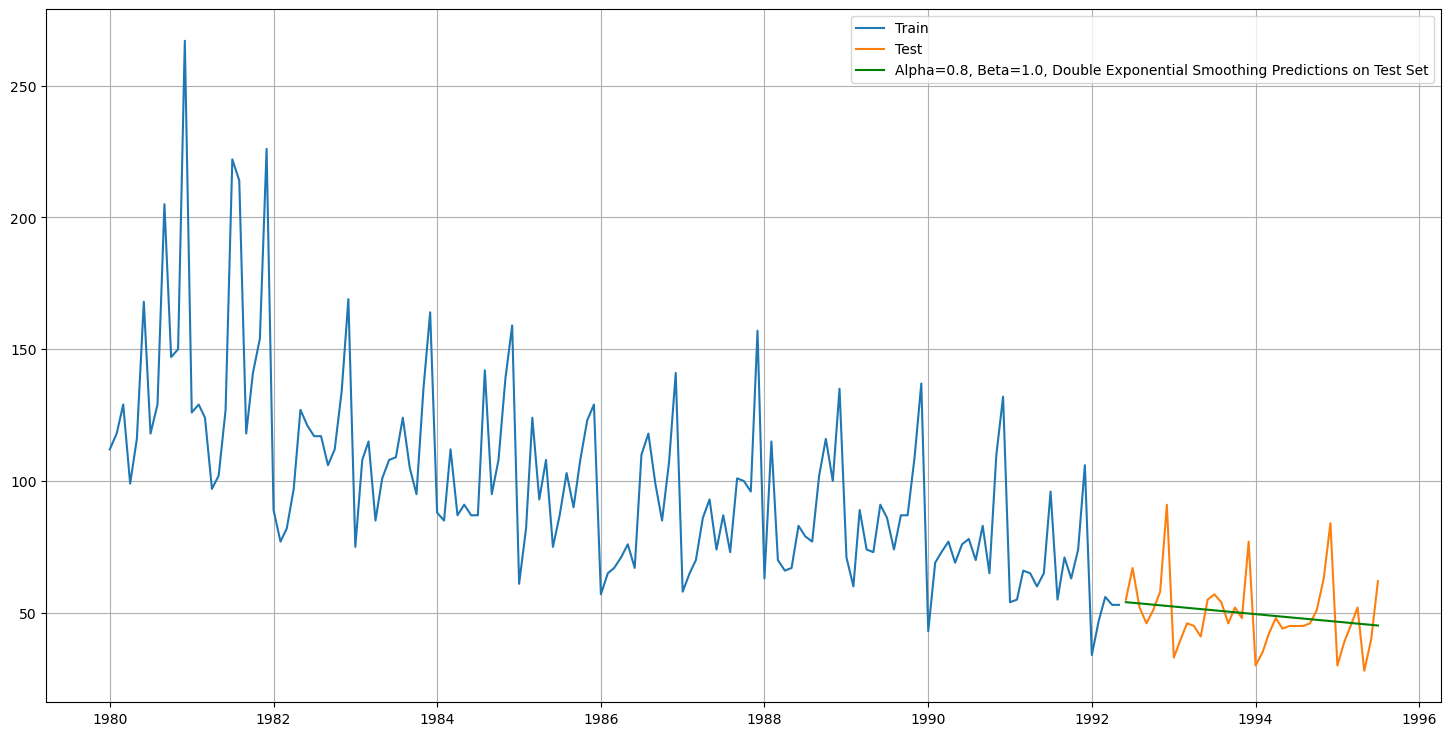

In [47]:
plt.figure(figsize=(18,9))
plt.plot(DES_train['Rose'], label='Train')
plt.plot(DES_test['Rose'], label='Test')

plt.plot(DES_test['predict', 0.8000000000000003, 1.0000000000000002], label='Alpha=0.8, Beta=1.0, Double Exponential Smoothing Predictions on Test Set', color='green')
    
#plt.plot(DES_test['predict', 0.8, 1.0], label='Alpha=0.8,Beta=1.0,DoubleExponentialSmoothing predictions on Test Set')
plt.legend(loc='best')
plt.grid()
plt.show()

### Model Evaluation

In [48]:
resultsDf_7_1 = pd.DataFrame({'Test RMSE': [resultsDf_7.sort_values(by=['Test RMSE']).values[0][3]]}
                           ,index=['Alpha=0.8,Beta=1.0,DoubleExponentialSmoothing'])

resultsDf = pd.concat([resultsDf, resultsDf_7_1])
resultsDf

,Test RMSE
RegressionOnTime,13.736625
SimpleAverageModel,52.239499
2pointTrailingMovingAverage,9.402197
4pointTrailingMovingAverage,12.186935
6pointTrailingMovingAverage,12.413090
9pointTrailingMovingAverage,12.620569
"Alpha=0.995,SimpleExponentialSmoothing",19.021186
"Alpha=0.9,SimpleExponentialSmoothing",13.838498
"Alpha=0.8,Beta=1.0,DoubleExponentialSmoothing",13.180564


### Triple Exponential Smoothing

In [49]:
TES_train = train_data.copy()
TES_test = test_data.copy()

In [50]:
model_TES = ExponentialSmoothing(TES_train['Rose'],trend='additive',seasonal='multiplicative',seasonal_periods=12)

C:\ProgramData\anaconda3\Lib\site-packages\statsmodels\tsa\base\tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  self._init_dates(dates, freq)


In [51]:
model_TES_autofit = model_TES.fit()
model_TES_autofit.params

{'smoothing_level': 0.09926222794517521,
 'smoothing_trend': 0.00011004882158931748,
 'smoothing_seasonal': 0.00021713667357767415,
 'damping_trend': nan,
 'initial_level': 153.11642701118197,
 'initial_trend': -0.6185535740569861,
 'initial_seasons': array([0.7104098 , 0.80373209, 0.88435157, 0.78124423, 0.86816859,
        0.93604567, 1.0446323 , 1.09107104, 1.03239048, 1.01242076,
        1.17874784, 1.61766735]),
 'use_boxcox': False,
 'lamda': None,
 'remove_bias': False}

In [52]:
TES_test['auto_predict'] = model_TES_autofit.forecast(steps=len(test_data))
TES_test.head()

,Rose,auto_predict
Date,,
1992-06-01,55.0,57.296561
1992-07-01,67.0,63.300550
1992-08-01,52.0,65.432195
1992-09-01,46.0,61.285164
1992-10-01,51.0,59.472849


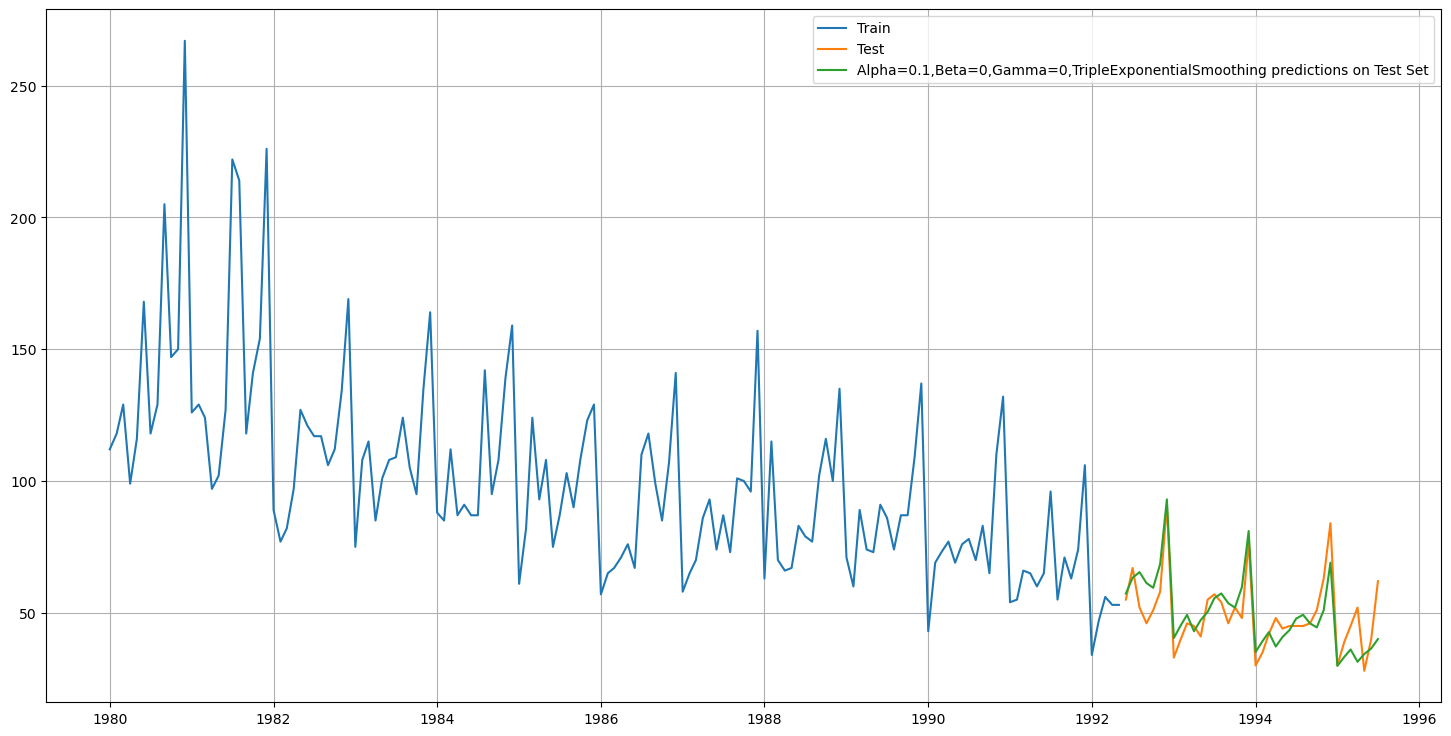

In [53]:
plt.figure(figsize=(18,9))
plt.plot(TES_train['Rose'], label='Train')
plt.plot(TES_test['Rose'], label='Test')
plt.plot(TES_test['auto_predict'], label='Alpha=0.1,Beta=0,Gamma=0,TripleExponentialSmoothing predictions on Test Set')
plt.legend(loc='best')
plt.grid();
plt.show()

### Model Evaluation

In [54]:
rmse_model6_test_1 = metrics.root_mean_squared_error(TES_test['Rose'],TES_test['auto_predict'])
print("For Alpha=0.1,Beta=0.0,Gamma=0.0, Triple Exponential Smoothing Model forecast on the Test Data,  RMSE is %3.3f" %(rmse_model6_test_1))

For Alpha=0.1,Beta=0.0,Gamma=0.0, Triple Exponential Smoothing Model forecast on the Test Data,  RMSE is 8.406


In [55]:
resultsDf_8_1 = pd.DataFrame({'Test RMSE': [rmse_model6_test_1]}
                           ,index=['Alpha=0.1,Beta=0.0,Gamma=0.0,TripleExponentialSmoothing'])

resultsDf = pd.concat([resultsDf, resultsDf_8_1])
resultsDf

,Test RMSE
RegressionOnTime,13.736625
SimpleAverageModel,52.239499
2pointTrailingMovingAverage,9.402197
4pointTrailingMovingAverage,12.186935
6pointTrailingMovingAverage,12.413090
9pointTrailingMovingAverage,12.620569
"Alpha=0.995,SimpleExponentialSmoothing",19.021186
"Alpha=0.9,SimpleExponentialSmoothing",13.838498
"Alpha=0.8,Beta=1.0,DoubleExponentialSmoothing",13.180564
"Alpha=0.1,Beta=0.0,Gamma=0.0,TripleExponentialSmoothing",8.406215


In [56]:
resultsDf_8_2 = pd.DataFrame({'Alpha Values':[],'Beta Values':[],'Gamma Values':[],'Train RMSE':[],'Test RMSE': []})

for i in np.arange(0.3,1.1,0.1):
    for j in np.arange(0.3,1.1,0.1):
        for k in np.arange(0.3,1.1,0.1):
            model_TES_alpha_i_j_k = model_TES.fit(smoothing_level=i,smoothing_trend=j,smoothing_seasonal=k,optimized=False,use_brute=True)
            TES_train['predict',i,j,k] = model_TES_alpha_i_j_k.fittedvalues
            TES_test['predict',i,j,k] = model_TES_alpha_i_j_k.forecast(steps=len(test_data))
        
            rmse_model8_train = metrics.root_mean_squared_error(TES_train['Rose'],TES_train['predict',i,j,k])
            
            rmse_model8_test = metrics.root_mean_squared_error(TES_test['Rose'],TES_test['predict',i,j,k])

            new_row = pd.DataFrame({'Alpha Values': [i], 
                                'Beta Values': [j],
                                'Gamma Values': [k],
                            'Train RMSE': [rmse_model8_train], 
                            'Test RMSE': [rmse_model8_test]})
    
            resultsDf_8_2 = pd.concat([resultsDf_8_2, new_row], ignore_index=True)  

C:\Users\sjaigu\AppData\Local\Temp\ipykernel_7064\2684122939.py:8: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  TES_test['predict',i,j,k] = model_TES_alpha_i_j_k.forecast(steps=len(test_data))
C:\Users\sjaigu\AppData\Local\Temp\ipykernel_7064\2684122939.py:7: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  TES_train['predict',i,j,k] = model_TES_alpha_i_j_k.fittedvalues
C:\Users\sjaigu\AppData\Local\Temp\ipykernel_7064\2684122939.py:8: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `fram

In [57]:
resultsDf_8_2.sort_values(by=['Test RMSE']).head()

,Alpha Values,Beta Values,Gamma Values,Train RMSE,Test RMSE
0,0.3,0.3,0.3,22.302474,6.689740
1,0.3,0.3,0.4,23.489524,6.794501
2,0.3,0.3,0.5,25.066440,8.180679
74,0.4,0.4,0.5,27.573219,10.503173
195,0.6,0.3,0.6,32.788153,11.277663


In [58]:
TES_test.columns

Index([                                                                 'Rose',
                                                                'auto_predict',
                                                    ('predict', 0.3, 0.3, 0.3),
                                                    ('predict', 0.3, 0.3, 0.4),
                                                    ('predict', 0.3, 0.3, 0.5),
                                     ('predict', 0.3, 0.3, 0.6000000000000001),
                                     ('predict', 0.3, 0.3, 0.7000000000000002),
                                     ('predict', 0.3, 0.3, 0.8000000000000003),
                                     ('predict', 0.3, 0.3, 0.9000000000000001),
                                     ('predict', 0.3, 0.3, 1.0000000000000002),
       ...
       ('predict', 1.0000000000000002, 0.9000000000000001, 0.9000000000000001),
       ('predict', 1.0000000000000002, 0.9000000000000001, 1.0000000000000002),
                      ('predi

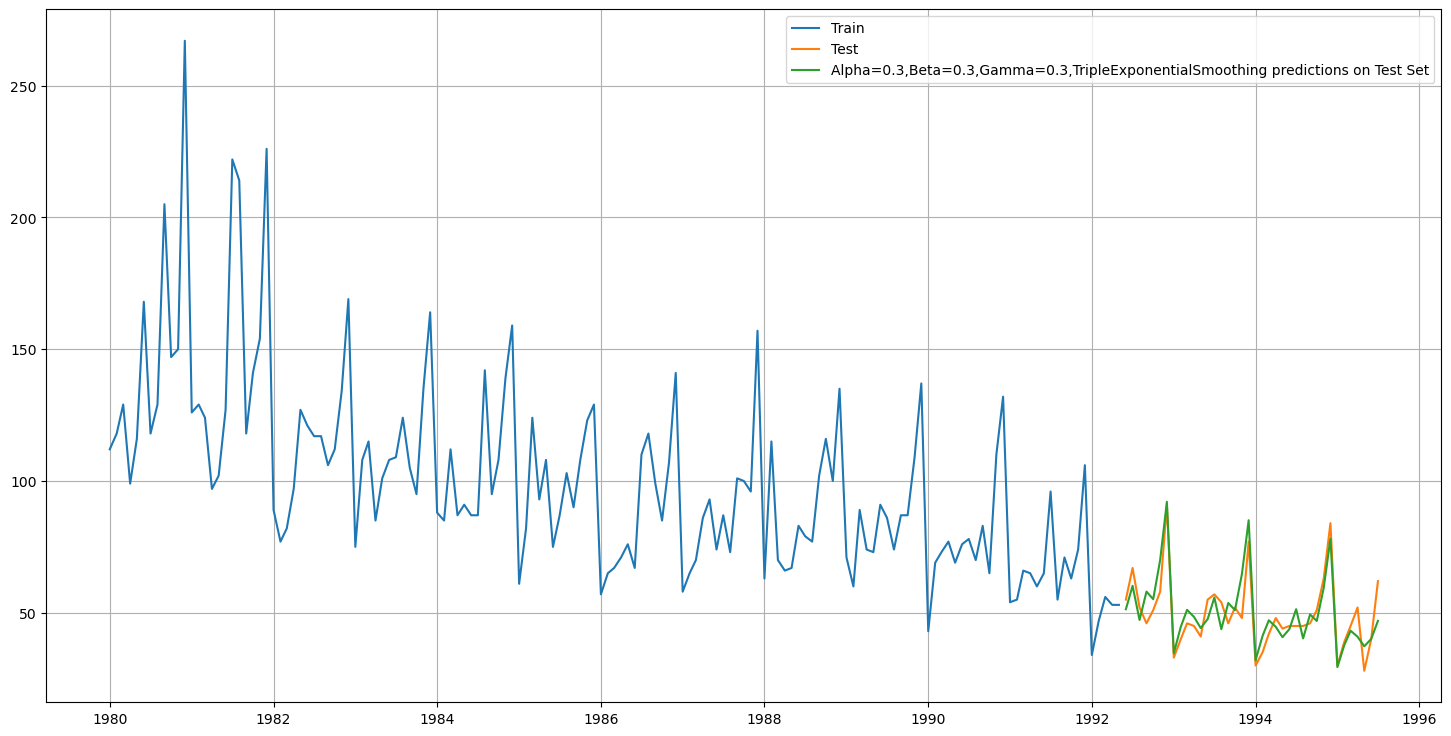

In [59]:
plt.figure(figsize=(18,9))
plt.plot(TES_train['Rose'], label='Train')
plt.plot(TES_test['Rose'], label='Test')

plt.plot(TES_test['predict', 0.3, 0.3, 0.3], label='Alpha=0.3,Beta=0.3,Gamma=0.3,TripleExponentialSmoothing predictions on Test Set')

plt.legend(loc='best')
plt.grid();

In [60]:
resultsDf_8_3 = pd.DataFrame({'Test RMSE': [resultsDf_8_2.sort_values(by=['Test RMSE']).values[0][4]]}
                           ,index=['Alpha=0.3,Beta=0.3,Gamma=0.3,TripleExponentialSmoothing'])

resultsDf = pd.concat([resultsDf, resultsDf_8_3])
resultsDf

,Test RMSE
RegressionOnTime,13.736625
SimpleAverageModel,52.239499
2pointTrailingMovingAverage,9.402197
4pointTrailingMovingAverage,12.186935
6pointTrailingMovingAverage,12.413090
9pointTrailingMovingAverage,12.620569
"Alpha=0.995,SimpleExponentialSmoothing",19.021186
"Alpha=0.9,SimpleExponentialSmoothing",13.838498
"Alpha=0.8,Beta=1.0,DoubleExponentialSmoothing",13.180564
"Alpha=0.1,Beta=0.0,Gamma=0.0,TripleExponentialSmoothing",8.406215


### Check the performance of the models built


In [61]:
print('Sorted by RMSE values on the Test Data:','\n',)
resultsDf.sort_values(by=['Test RMSE'])

Sorted by RMSE values on the Test Data: 



,Test RMSE
"Alpha=0.3,Beta=0.3,Gamma=0.3,TripleExponentialSmoothing",6.689740
"Alpha=0.1,Beta=0.0,Gamma=0.0,TripleExponentialSmoothing",8.406215
2pointTrailingMovingAverage,9.402197
4pointTrailingMovingAverage,12.186935
6pointTrailingMovingAverage,12.413090
9pointTrailingMovingAverage,12.620569
"Alpha=0.8,Beta=1.0,DoubleExponentialSmoothing",13.180564
RegressionOnTime,13.736625
"Alpha=0.9,SimpleExponentialSmoothing",13.838498
"Alpha=0.995,SimpleExponentialSmoothing",19.021186


### Inisghts:

**Best Performing Model:**
- The model with parameters Alpha=0.3, Beta=0.3, Gamma=0.3 using Triple Exponential Smoothing has the lowest RMSE of 6.69. This indicates that this model is the most accurate among those listed, effectively capturing trends and seasonality in the data.

**Moderate Performance:**
- The second-best model is another Triple Exponential Smoothing with parameters Alpha=0.1, Beta=0.0, Gamma=0.0, yielding an RMSE of 8.41. This model is less responsive to changes in level and trend but still performs well compared to simpler models.

**Trailing Moving Averages:**
- The 2-point Trailing Moving Average has an RMSE of 9.40, indicating it performs reasonably well but is less accurate than the Triple Exponential Smoothing models. As the window size increases (4-point to 9-point), the RMSE values also increase slightly (from 12.19 to 12.62). This suggests that larger moving averages may introduce more lag and reduce responsiveness to recent changes.

**Simple and Double Exponential Smoothing Models:**
- The Double Exponential Smoothing model with parameters Alpha=0.8, Beta=1.0 has an RMSE of 13.18, indicating moderate accuracy but not as effective as the best Triple Exponential Smoothing model. The Simple Exponential Smoothing models show higher RMSE values (ranging from 13.84 to 19.02), suggesting they may not capture trends and seasonality as effectively as more complex models.

**Regression on Time:**
- The Regression on Time model has an RMSE of 13.74, which is comparable to the Simple Exponential Smoothing models but does not outperform them. This indicates that while regression can be useful for trend analysis, it may not adequately capture seasonal patterns present in the data.

**Overall Performance Trends:**
- The trend indicates that more sophisticated models (like Triple Exponential Smoothing) generally outperform simpler models (like Simple Average or Simple Exponential Smoothing).
- Models that incorporate seasonality and trend components tend to yield lower RMSE values compared to those that do not.


### Check for Stationarity
- Check for stationarity
- Make the data stationary (if needed)


In [62]:
from statsmodels.tsa.stattools import adfuller

# Perform the Augmented Dickey-Fuller test
adf_test = adfuller(train_data['Rose'])

# Extract and display the results
adf_result = {
    'ADF Statistic': adf_test[0],
    'p-value': adf_test[1],
    'Critical Values': adf_test[4]
}
print(adf_result)

# Interpretation of the results 
alpha = 0.05  # Significance level ( If the p-value is less than 0.05, the data is stationary)
if adf_test[1] < alpha:
    print("Reject the null hypothesis: The time series is stationary.")
else:
    print("Fail to reject the null hypothesis: The time series is non-stationary.")

{'ADF Statistic': -1.6493786488252413, 'p-value': 0.4573644979863173, 'Critical Values': {'1%': -3.479742586699182, '5%': -2.88319822181578, '10%': -2.578319684499314}}
Fail to reject the null hypothesis: The time series is non-stationary.


In [63]:
# As Data is not Stationary so we have to make it stationary using the Differencing method
df_diff = train_data['Rose'].diff().dropna()

# Check stationarity again after differencing
adf_test_diff = adfuller(df_diff)

adf_result_diff = {
    'ADF Statistic': adf_test_diff[0],
    'p-value': adf_test_diff[1],
    'Critical Values': adf_test_diff[4]
}
print(adf_result_diff)

alpha = 0.05  # Significance level ( If the p-value is less than 0.05, the data is stationary)
if adf_test_diff[1] < alpha:
    print("Reject the null hypothesis: The time series is stationary.")
else:
    print("Fail to reject the null hypothesis: The time series is non-stationary.")

{'ADF Statistic': -7.132106257261458, 'p-value': 3.4961016848599786e-10, 'Critical Values': {'1%': -3.479742586699182, '5%': -2.88319822181578, '10%': -2.578319684499314}}
Reject the null hypothesis: The time series is stationary.


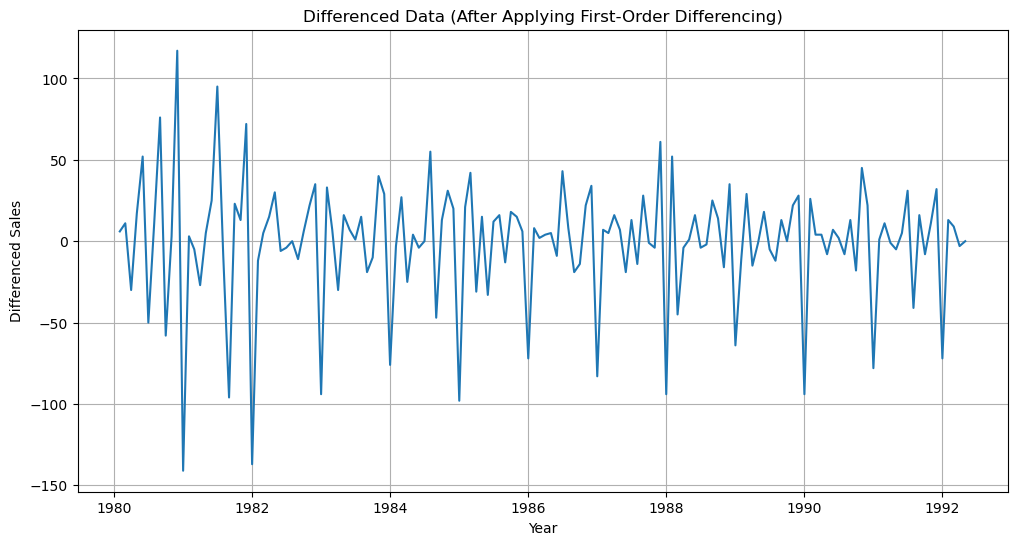

In [64]:
# Re-plot the differenced data

plt.figure(figsize=(12, 6))
plt.plot(df_diff)
plt.title('Differenced Data (After Applying First-Order Differencing)')
plt.xlabel('Year')
plt.ylabel('Differenced Sales')
plt.grid(True)
plt.show()

### Model Building - Stationary Data

### Generate ACF & PACF Plot and find the AR, MA values. 

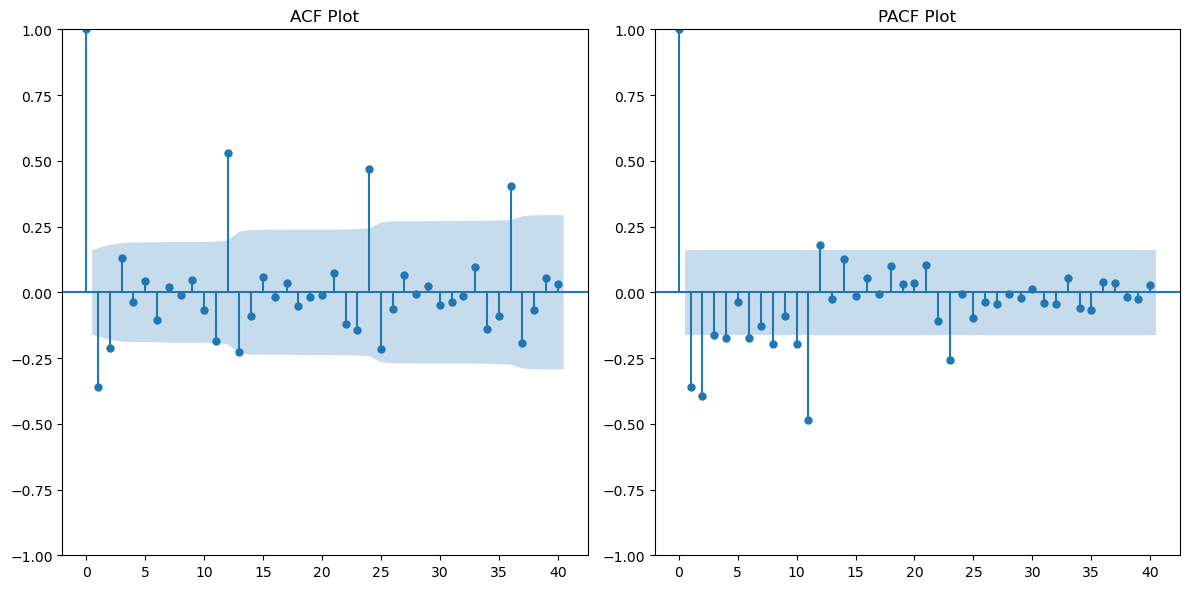

In [65]:
from statsmodels.graphics.tsaplots import plot_acf, plot_pacf

# ACF and PACF plots for the differenced data
plt.figure(figsize=(12, 6))

plt.subplot(121)
plot_acf(df_diff, ax=plt.gca(), lags=40)
plt.title('ACF Plot')

plt.subplot(122)
plot_pacf(df_diff, ax=plt.gca(), lags=40)
plt.title('PACF Plot')

plt.tight_layout()
plt.show()


### Insights

**Seasonality Detection**

- In the ACF plot, you can see significant spikes at regular intervals (e.g., every 12 lags), suggesting a seasonal pattern.

**AR and MA Values**

- **AR (p) value:** The PACF shows a significant spike at lag 1, suggesting an AR(1) component.

- **MA (q) value:** The ACF shows a multiple significant spikes, suggesting an MA(1) or MA(2) components could be a good starting point.

### Build different ARIMA models
- Auto ARIMA 

In [66]:
# We’ll use the auto_arima function to automatically find the best ARIMA model by evaluating different combinations of (p, d, q) parameters.

print(train_data.shape)
print(test_data.shape)

(149, 1)
(38, 1)


In [67]:
from pmdarima import auto_arima

# Auto ARIMA model
auto_arima_model = auto_arima(train_data['Rose'], seasonal=False, trace=True, error_action='ignore', suppress_warnings=True)
auto_arima_model.summary()

# Forecast using the Auto ARIMA model
arima_forecast = auto_arima_model.predict(n_periods=len(test_data))

# Calculate RMSE for Auto ARIMA
arima_rmse = np.sqrt(metrics.mean_squared_error(test_data['Rose'], arima_forecast))
print(f'Auto ARIMA RMSE: {arima_rmse}')


Performing stepwise search to minimize aic
 ARIMA(2,1,2)(0,0,0)[0] intercept   : AIC=inf, Time=0.72 sec
 ARIMA(0,1,0)(0,0,0)[0] intercept   : AIC=1501.162, Time=0.05 sec
 ARIMA(1,1,0)(0,0,0)[0] intercept   : AIC=1482.523, Time=0.12 sec
 ARIMA(0,1,1)(0,0,0)[0] intercept   : AIC=inf, Time=0.24 sec
 ARIMA(0,1,0)(0,0,0)[0]             : AIC=1499.179, Time=0.05 sec
 ARIMA(2,1,0)(0,0,0)[0] intercept   : AIC=1459.779, Time=0.15 sec
 ARIMA(3,1,0)(0,0,0)[0] intercept   : AIC=1457.898, Time=0.19 sec
 ARIMA(4,1,0)(0,0,0)[0] intercept   : AIC=1455.517, Time=0.25 sec
 ARIMA(5,1,0)(0,0,0)[0] intercept   : AIC=1457.310, Time=0.37 sec
 ARIMA(4,1,1)(0,0,0)[0] intercept   : AIC=inf, Time=0.63 sec
 ARIMA(3,1,1)(0,0,0)[0] intercept   : AIC=inf, Time=0.41 sec
 ARIMA(5,1,1)(0,0,0)[0] intercept   : AIC=inf, Time=0.93 sec
 ARIMA(4,1,0)(0,0,0)[0]             : AIC=1453.703, Time=0.13 sec
 ARIMA(3,1,0)(0,0,0)[0]             : AIC=1456.025, Time=0.13 sec
 ARIMA(5,1,0)(0,0,0)[0]             : AIC=1455.511, Time=0

- Manual ARIMA 

In [68]:
from statsmodels.tsa.arima.model import ARIMA

# Manual ARIMA model (example: p=2, d=1, q=2)
manual_arima_model = ARIMA(train_data['Rose'], order=(2, 1, 2))
manual_arima_fit = manual_arima_model.fit()

# Forecast using Manual ARIMA
manual_arima_forecast = manual_arima_fit.forecast(steps=len(test_data))

# Calculate RMSE for Manual ARIMA
manual_arima_rmse = np.sqrt(metrics.mean_squared_error(test_data['Rose'], manual_arima_forecast))
print(f'Manual ARIMA RMSE: {manual_arima_rmse}')


C:\ProgramData\anaconda3\Lib\site-packages\statsmodels\tsa\base\tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  self._init_dates(dates, freq)
C:\ProgramData\anaconda3\Lib\site-packages\statsmodels\tsa\base\tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  self._init_dates(dates, freq)
C:\ProgramData\anaconda3\Lib\site-packages\statsmodels\tsa\base\tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  self._init_dates(dates, freq)


Manual ARIMA RMSE: 20.807042612472586


### Build different SARIMA models
- Auto SARIMA 

In [69]:
from pmdarima import auto_arima

# Auto SARIMA model with seasonality (s=12 for monthly data)
auto_sarima_model = auto_arima(train_data['Rose'], seasonal=True, m=12, trace=True, error_action='ignore', suppress_warnings=True)
auto_sarima_model.summary()

# Forecast using the Auto SARIMA model
sarima_forecast = auto_sarima_model.predict(n_periods=len(test_data))

# Calculate RMSE for Auto SARIMA
sarima_rmse = np.sqrt(metrics.mean_squared_error(test_data['Rose'], sarima_forecast))
print(f'Auto SARIMA RMSE: {sarima_rmse}')


Performing stepwise search to minimize aic
 ARIMA(2,1,2)(1,0,1)[12] intercept   : AIC=inf, Time=1.74 sec
 ARIMA(0,1,0)(0,0,0)[12] intercept   : AIC=1501.162, Time=0.04 sec
 ARIMA(1,1,0)(1,0,0)[12] intercept   : AIC=1425.720, Time=0.33 sec
 ARIMA(0,1,1)(0,0,1)[12] intercept   : AIC=inf, Time=0.58 sec
 ARIMA(0,1,0)(0,0,0)[12]             : AIC=1499.179, Time=0.05 sec
 ARIMA(1,1,0)(0,0,0)[12] intercept   : AIC=1482.523, Time=0.13 sec
 ARIMA(1,1,0)(2,0,0)[12] intercept   : AIC=1404.734, Time=0.98 sec
 ARIMA(1,1,0)(2,0,1)[12] intercept   : AIC=1397.225, Time=1.70 sec
 ARIMA(1,1,0)(1,0,1)[12] intercept   : AIC=1395.476, Time=0.85 sec
 ARIMA(1,1,0)(0,0,1)[12] intercept   : AIC=1449.951, Time=0.36 sec
 ARIMA(1,1,0)(1,0,2)[12] intercept   : AIC=1397.295, Time=1.96 sec
 ARIMA(1,1,0)(0,0,2)[12] intercept   : AIC=1432.149, Time=1.18 sec
 ARIMA(1,1,0)(2,0,2)[12] intercept   : AIC=inf, Time=3.44 sec
 ARIMA(0,1,0)(1,0,1)[12] intercept   : AIC=1411.367, Time=0.46 sec
 ARIMA(2,1,0)(1,0,1)[12] intercept

In [70]:
from statsmodels.tsa.statespace.sarimax import SARIMAX

# Manual SARIMA model (example: p=1, d=1, q=1, P=1, D=1, Q=1, s=12)
manual_sarima_model = SARIMAX(train_data['Rose'], order=(1, 1, 1), seasonal_order=(1, 1, 1, 12))
manual_sarima_fit = manual_sarima_model.fit()

# Forecast using Manual SARIMA
manual_sarima_forecast = manual_sarima_fit.forecast(steps=len(test_data))

# Calculate RMSE for Manual SARIMA
manual_sarima_rmse = np.sqrt(metrics.mean_squared_error(test_data['Rose'], manual_sarima_forecast))
print(f'Manual SARIMA RMSE: {manual_sarima_rmse}')


C:\ProgramData\anaconda3\Lib\site-packages\statsmodels\tsa\base\tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  self._init_dates(dates, freq)
C:\ProgramData\anaconda3\Lib\site-packages\statsmodels\tsa\base\tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  self._init_dates(dates, freq)


Manual SARIMA RMSE: 11.266352946919064


### Check the performance of the models built

In [71]:
print(f"Auto ARIMA RMSE: {arima_rmse}")
print(f"Manual ARIMA RMSE: {manual_arima_rmse}")
print(f"Auto SARIMA RMSE: {sarima_rmse}")
print(f"Manual SARIMA RMSE: {manual_sarima_rmse}")

Auto ARIMA RMSE: 19.727415342393787
Manual ARIMA RMSE: 20.807042612472586
Auto SARIMA RMSE: 10.656532756396611
Manual SARIMA RMSE: 11.266352946919064


### Compare the performance of the models
- Compare the performance of all the models built

In [72]:
resultsDf_9 = pd.DataFrame({'Test RMSE': [arima_rmse]}
                           ,index=['Auto ARIMA RMSE'])

resultsDf_10 = pd.DataFrame({'Test RMSE': [manual_arima_rmse, sarima_rmse, manual_sarima_rmse]}
                           ,index=['Manual ARIMA RMSE', 'Auto SARIMA RMSE', 'Manual SARIMA RMSE'])

resultsDf = pd.concat([resultsDf, resultsDf_9, resultsDf_10])
resultsDf

,Test RMSE
RegressionOnTime,13.736625
SimpleAverageModel,52.239499
2pointTrailingMovingAverage,9.402197
4pointTrailingMovingAverage,12.186935
6pointTrailingMovingAverage,12.413090
9pointTrailingMovingAverage,12.620569
"Alpha=0.995,SimpleExponentialSmoothing",19.021186
"Alpha=0.9,SimpleExponentialSmoothing",13.838498
"Alpha=0.8,Beta=1.0,DoubleExponentialSmoothing",13.180564
"Alpha=0.1,Beta=0.0,Gamma=0.0,TripleExponentialSmoothing",8.406215


In [80]:
# Compare RMSEs
resultsDf.sort_values(by=['Test RMSE'])

,Test RMSE
"Alpha=0.3,Beta=0.3,Gamma=0.3,TripleExponentialSmoothing",6.689740
"Alpha=0.1,Beta=0.0,Gamma=0.0,TripleExponentialSmoothing",8.406215
2pointTrailingMovingAverage,9.402197
Auto SARIMA RMSE,10.656533
Manual SARIMA RMSE,11.266353
4pointTrailingMovingAverage,12.186935
6pointTrailingMovingAverage,12.413090
9pointTrailingMovingAverage,12.620569
"Alpha=0.8,Beta=1.0,DoubleExponentialSmoothing",13.180564
RegressionOnTime,13.736625


In [73]:

performance = resultsDf['Test RMSE'].to_dict()

# Find the best model 
best_model = min(performance, key=performance.get)
print(f'Best Model: {best_model} with RMSE: {performance[best_model]}') 


Best Model: Alpha=0.3,Beta=0.3,Gamma=0.3,TripleExponentialSmoothing with RMSE: 6.689740159064305


- Choose the best model with proper rationale

The model with the lowest RMSE is considered the best fit for the data. 
So,
- Best Model: Alpha=0.3,Beta=0.3,Gamma=0.3,TripleExponentialSmoothing with RMSE: 6.689740159064305


#### Rebuild the best model using the entire data

In [77]:
model = ExponentialSmoothing(
    df['Rose'], 
    seasonal_periods=12,  # assuming monthly data with yearly seasonality
    trend='additive', 
    seasonal='multiplicative'
)
best_model_fit = model.fit(smoothing_level=0.3, smoothing_slope=0.3, smoothing_seasonal=0.3)

forecast_next_12 = best_model_fit.forecast(steps=12)
print("Forecast for the next 12 months:")
print(forecast_next_12)

Forecast for the next 12 months:
1995-08-01    42.778900
1995-09-01    42.282287
1995-10-01    44.492234
1995-11-01    51.203774
1995-12-01    72.248703
1996-01-01    26.949949
1996-02-01    34.092016
1996-03-01    40.118874
1996-04-01    42.787229
1996-05-01    33.844706
1996-06-01    40.811124
1996-07-01    44.304554
Freq: MS, dtype: float64


C:\ProgramData\anaconda3\Lib\site-packages\statsmodels\tsa\base\tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  self._init_dates(dates, freq)
C:\Users\sjaigu\AppData\Local\Temp\ipykernel_7064\1884652257.py:7: FutureWarning: the 'smoothing_slope' keyword is deprecated, use 'smoothing_trend' instead.
  best_model_fit = model.fit(smoothing_level=0.3, smoothing_slope=0.3, smoothing_seasonal=0.3)


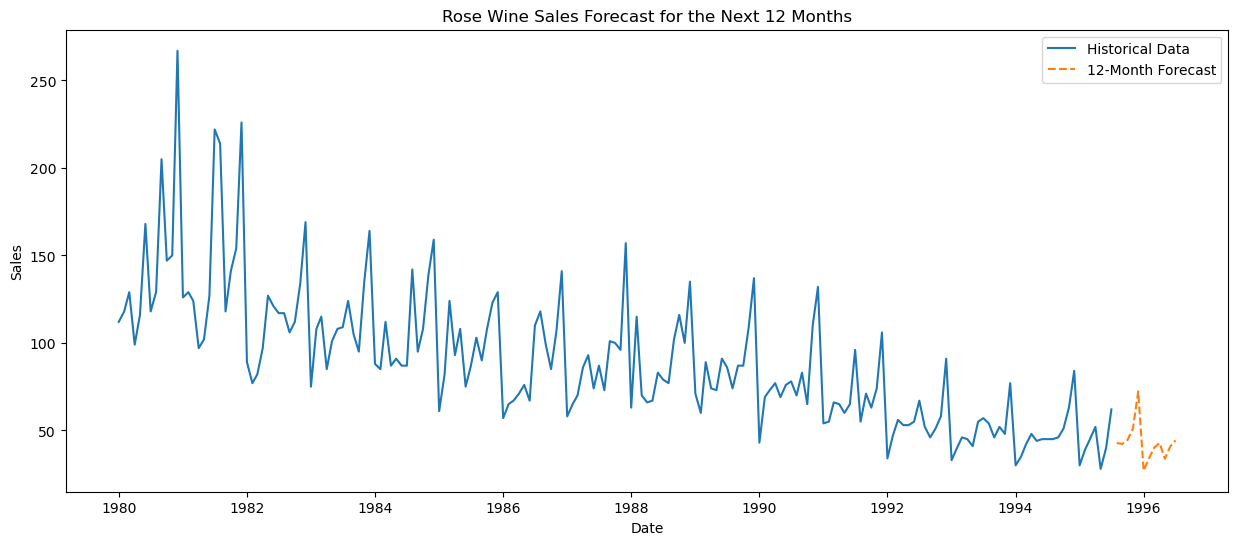

In [79]:
# Plot the forecasted values along with the historical data
plt.figure(figsize=(15, 6))
plt.plot(df['Rose'], label='Historical Data')
plt.plot(forecast_next_12, label='12-Month Forecast', linestyle='--')
plt.title('Rose Wine Sales Forecast for the Next 12 Months')
plt.xlabel('Date')
plt.ylabel('Sales')
plt.legend()
plt.show()

### Actionable Insights & Recommendations
- Conclude with the key takeaways (actionable insights and recommendations) for the business

- #### Seasonal Trends and Patterns:
The historical data shows evident seasonal fluctuations in rose wine sales, which are captured effectively by the forecasting model. This understanding allows the business to plan inventory and marketing strategies around peak sales periods, ensuring product availability and targeted promotions.
- #### Strategic Planning:
The forecast data enables the company to align its business strategies with expected market conditions, allowing for agile responses to changing consumer demands. This alignment ensures that the company remains competitive and can capitalize on emerging opportunities.
- #### Forecast Accuracy:
The chosen model provides a reliable 12-month forecast, demonstrating its capability to predict future sales trends accurately. This prediction empowers the company to make informed decisions regarding production scaling, resource allocation, and financial planning.
- #### Risk Management:
By anticipating potential dips in sales, the company can proactively manage risks associated with overproduction and stockouts. This foresight helps in maintaining optimal inventory levels, reducing storage costs, and minimizing wastage.

#### Model Choice:
- #### Triple Exponential Smoothing Model:
This model was chosen because it effectively captures both the trend and seasonality present in the data. It uses seasonal differencing to handle the periodic peaks and troughs, making it well-suited for forecasting sales that fluctuate seasonally.

#### Business Recommendations:
- #### Optimize Inventory Management:
Use the model's predictions to streamline inventory processes. This includes adjusting order quantities and delivery schedules to align with forecasted sales, thereby reducing excess inventory and associated costs.
- #### Enhance Marketing Efforts:
Utilize forecast insights to design targeted marketing campaigns during high-demand periods. Special promotions and advertising should be synchronized with expected sales surges to maximize revenue.
- #### Resource Allocation:
With accurate sales predictions, resources such as labor and logistics can be better allocated to meet demand efficiently, reducing costs and improving service levels.
- #### Strategic Planning:
The insights from the forecast can inform long-term strategic decisions, such as expanding production capacity or entering new markets during growth phases.

- By adopting this forecasting model, the company can enhance its ability to anticipate market trends, optimize resource utilization, and ultimately drive growth in sales and profitability.

